# Daily EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import rcParams

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

from sklearn import metrics
from sklearn.model_selection import train_test_split


plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
df = pd.read_csv('../capstone-data/daily-merged.csv')

In [3]:
df.rename(columns={'Unnamed: 0':'date'},inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.sort_index(inplace=True)

In [4]:
df= df.asfreq('d')

In [5]:
df.index.duplicated().sum()

0

In [6]:
assert (df.isna().sum()==0).all()

In [7]:
df.index

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30'],
              dtype='datetime64[ns]', name='date', length=7639, freq='D')

In [8]:
df.head()

,bus,rail_boardings,total_rides,prcp,tmax,tmin,gas_open,gas_close,gas_volume,3_mo,6_mo,1_yr,2_yr,3_yr,5_yr,7_yr,10_yr,20_yr,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings,H7_Vaccination policy,H8_Protection of elderly people,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex,total_daily_doses,total_daily_cum,first_dose_daily,first_dose_cum,first_dose_percent_pop,vax_series_completed_daily,vax_series_cum,vax_series_percent,crash_occurrences,damage_indicator
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,297192.0,126455.0,423647.0,0.0,26.0,13.0,0.794,0.7950,14697.0,5.87,5.58,5.11,4.87,4.82,4.76,4.97,4.92,5.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-02,780827.0,501952.0,1282779.0,0.0,21.0,7.0,0.794,0.7950,14697.0,5.87,5.58,5.11,4.87,4.82,4.76,4.97,4.92,5.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-03,824923.0,536432.0,1361355.0,0.0,28.0,7.0,0.799,0.8100,10219.0,5.69,5.44,5.04,4.92,4.92,4.94,5.18,5.14,5.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-04,870021.0,550011.0,1420032.0,0.0,32.0,23.0,0.815,0.8186,17869.0,5.37,5.20,4.82,4.77,4.78,4.82,5.07,5.03,5.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-05,890426.0,557917.0,1448343.0,0.0,37.0,24.0,0.815,0.8205,18617.0,5.12,4.98,4.60,4.56,4.57,4.66,4.93,4.93,5.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.shape

(7639, 51)

In [10]:
# Code modified from code written by Matthew Garton.

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

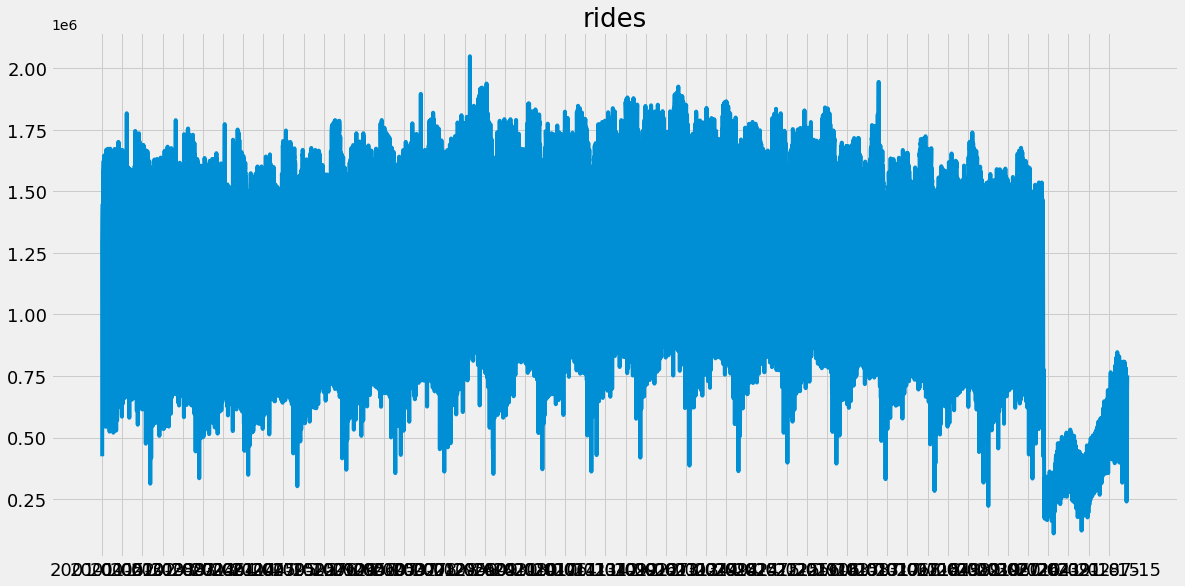

In [11]:
plot_series(df,['total_rides'], title='rides',steps=150)

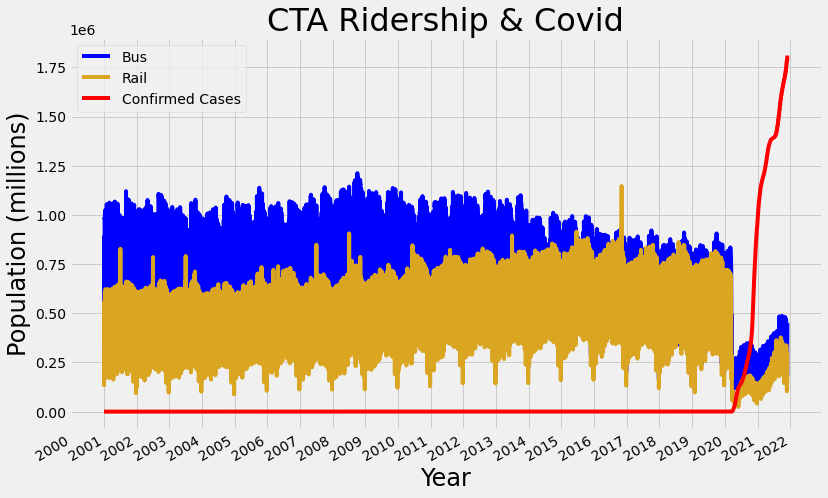

In [12]:
plt.figure(figsize=(12,8))

plt.plot(df['bus'],label='Bus',color='blue',)
plt.plot(df['rail_boardings'],label='Rail',color='goldenrod',);
plt.plot(df['ConfirmedCases'],label='Confirmed Cases',color='red',)

plt.title('CTA Ridership & Covid',size=32)
plt.xlabel('Year',size=24)
plt.ylabel('Population (millions)',size=24)
plt.legend();

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate() # Rotation
plt.show()


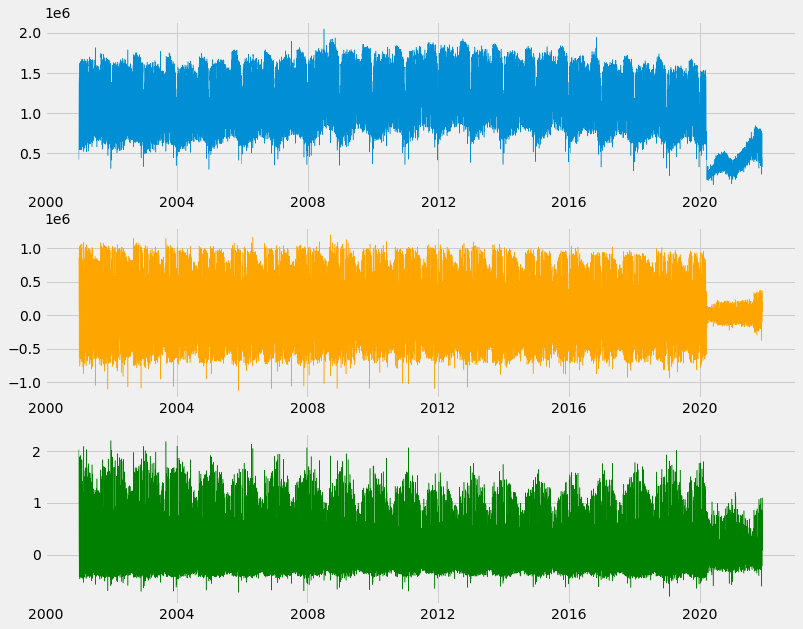

In [13]:
plt.figure(figsize=(12,10))

plt.subplot(3,1,1)
plt.plot(df['total_rides'],label='norm',linewidth=.5)
plt.subplot(3,1,2)
plt.plot(df['total_rides'].diff(),label='diff', color='orange',linewidth=.5)
plt.subplot(3,1,3)
plt.plot(df['total_rides'].pct_change(),label='pct_change', color='green',linewidth=.5);


In [14]:
rides = df[['total_rides']].copy()

In [15]:
rides.shape

(7639, 1)

# Total Rides

In [16]:
decomp = seasonal_decompose(df['total_rides'])


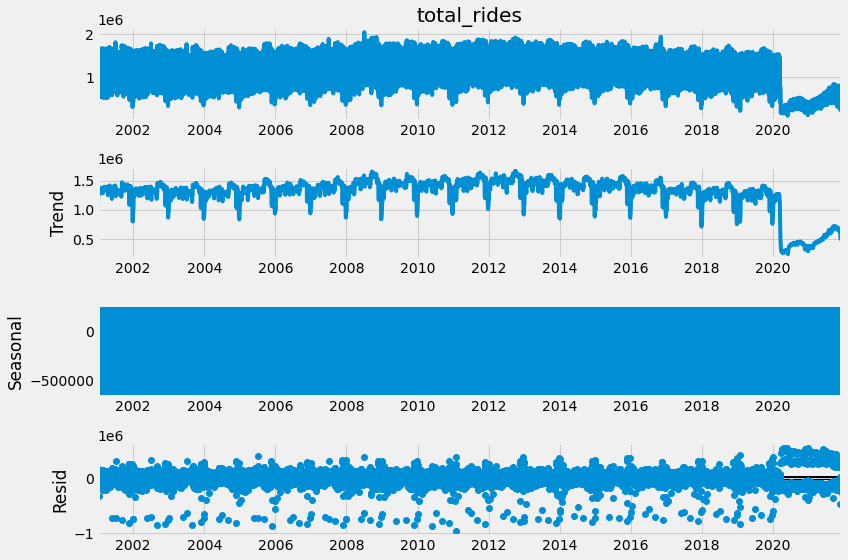

In [17]:
rcParams['figure.figsize'] = (12, 8)
decomp.plot();

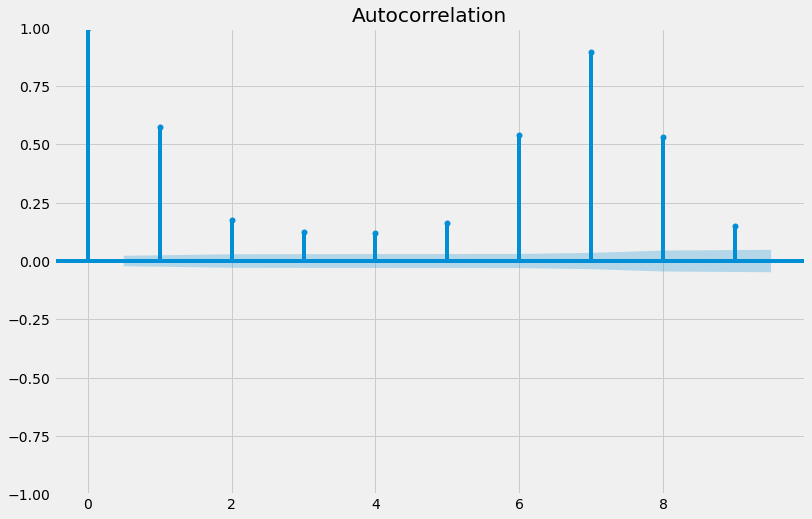

In [24]:
plot_acf(rides['total_rides'],lags=9);

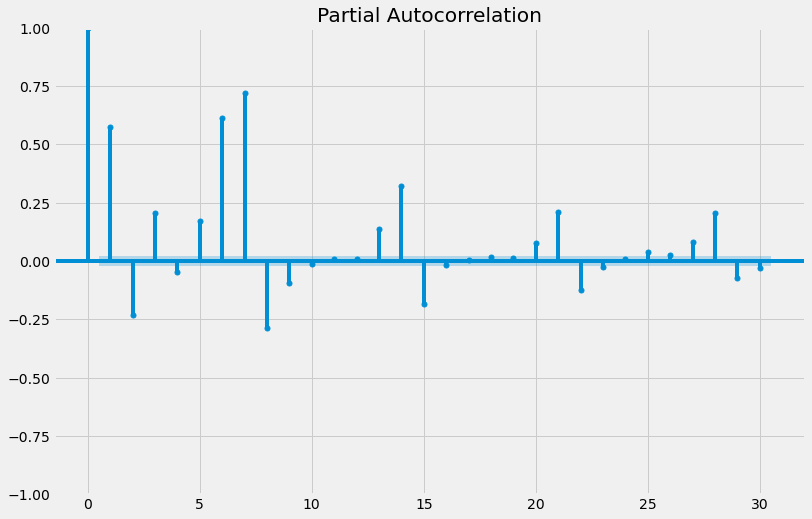

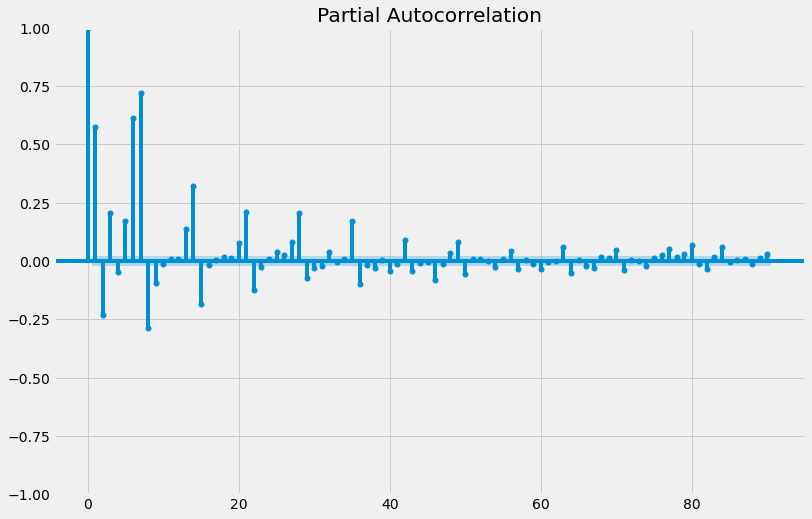

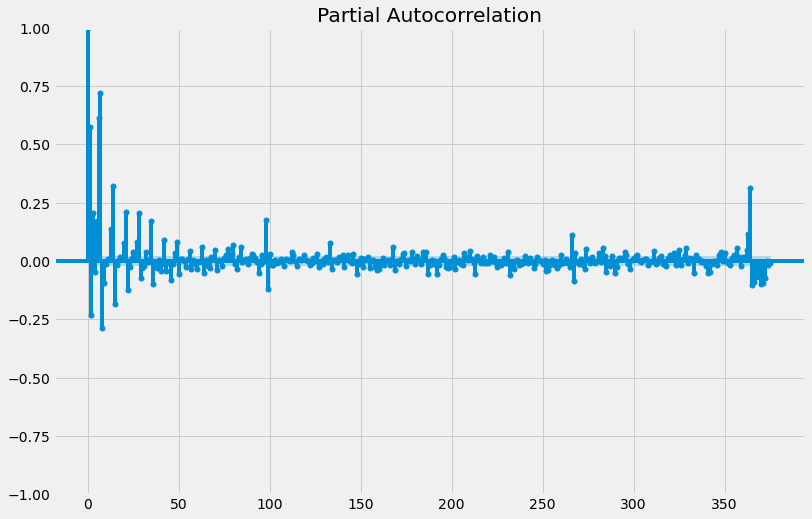

In [19]:
plot_pacf(rides['total_rides'], lags=30,method='ywm');
plot_pacf(rides['total_rides'], lags=90,method='ywm');
plot_pacf(rides['total_rides'], lags=375,method='ywm');


We can see clear seasonality with weekly peaks and stronger partial autocorrelation closer to 1 lag and that 7-day lag mark.

# Multivariate Model Setup

In [9]:
df.columns

Index(['bus', 'rail_boardings', 'total_rides', 'prcp', 'snow', 'snwd', 'tmax',
       'tmin', 'gas_open', 'gas_close', 'gas_volume', '3_mo', '6_mo', '1_yr',
       '2_yr', '3_yr', '5_yr', '7_yr', '10_yr', '20_yr', 'C1_School closing',
       'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'E1_Income support',
       'E2_Debt/contract relief', 'H1_Public information campaigns',
       'H2_Testing policy', 'H3_Contact tracing', 'H6_Facial Coverings',
       'H7_Vaccination policy', 'H8_Protection of elderly people',
       'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyLegacyIndex', 'GovernmentResponseIndex',
       'ContainmentHealthIndex', 'EconomicSupportIndex', 'total_daily_doses',
       'total_daily_cum', 'first_dose_daily', 'first_dose_cum',
       'first_dose_per

In [10]:
X=df[['total_rides', 'prcp', 'snow', 'snwd', 'tmax',
       'tmin', 'gas_open', 'gas_close', 'gas_volume', '3_mo', '6_mo', '1_yr',
       '2_yr', '3_yr', '5_yr', '7_yr', '10_yr', '20_yr','H7_Vaccination policy', 'H8_Protection of elderly people',
       'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex','total_daily_doses',
       'total_daily_cum', 'first_dose_daily', 'first_dose_cum',
       'first_dose_percent_pop', 'vax_series_completed_daily',
       'vax_series_cum', 'vax_series_percent', 'crash_occurrences',
       'damage_indicator', 'crash_occruences','StringencyLegacyIndex', 'GovernmentResponseIndex']]

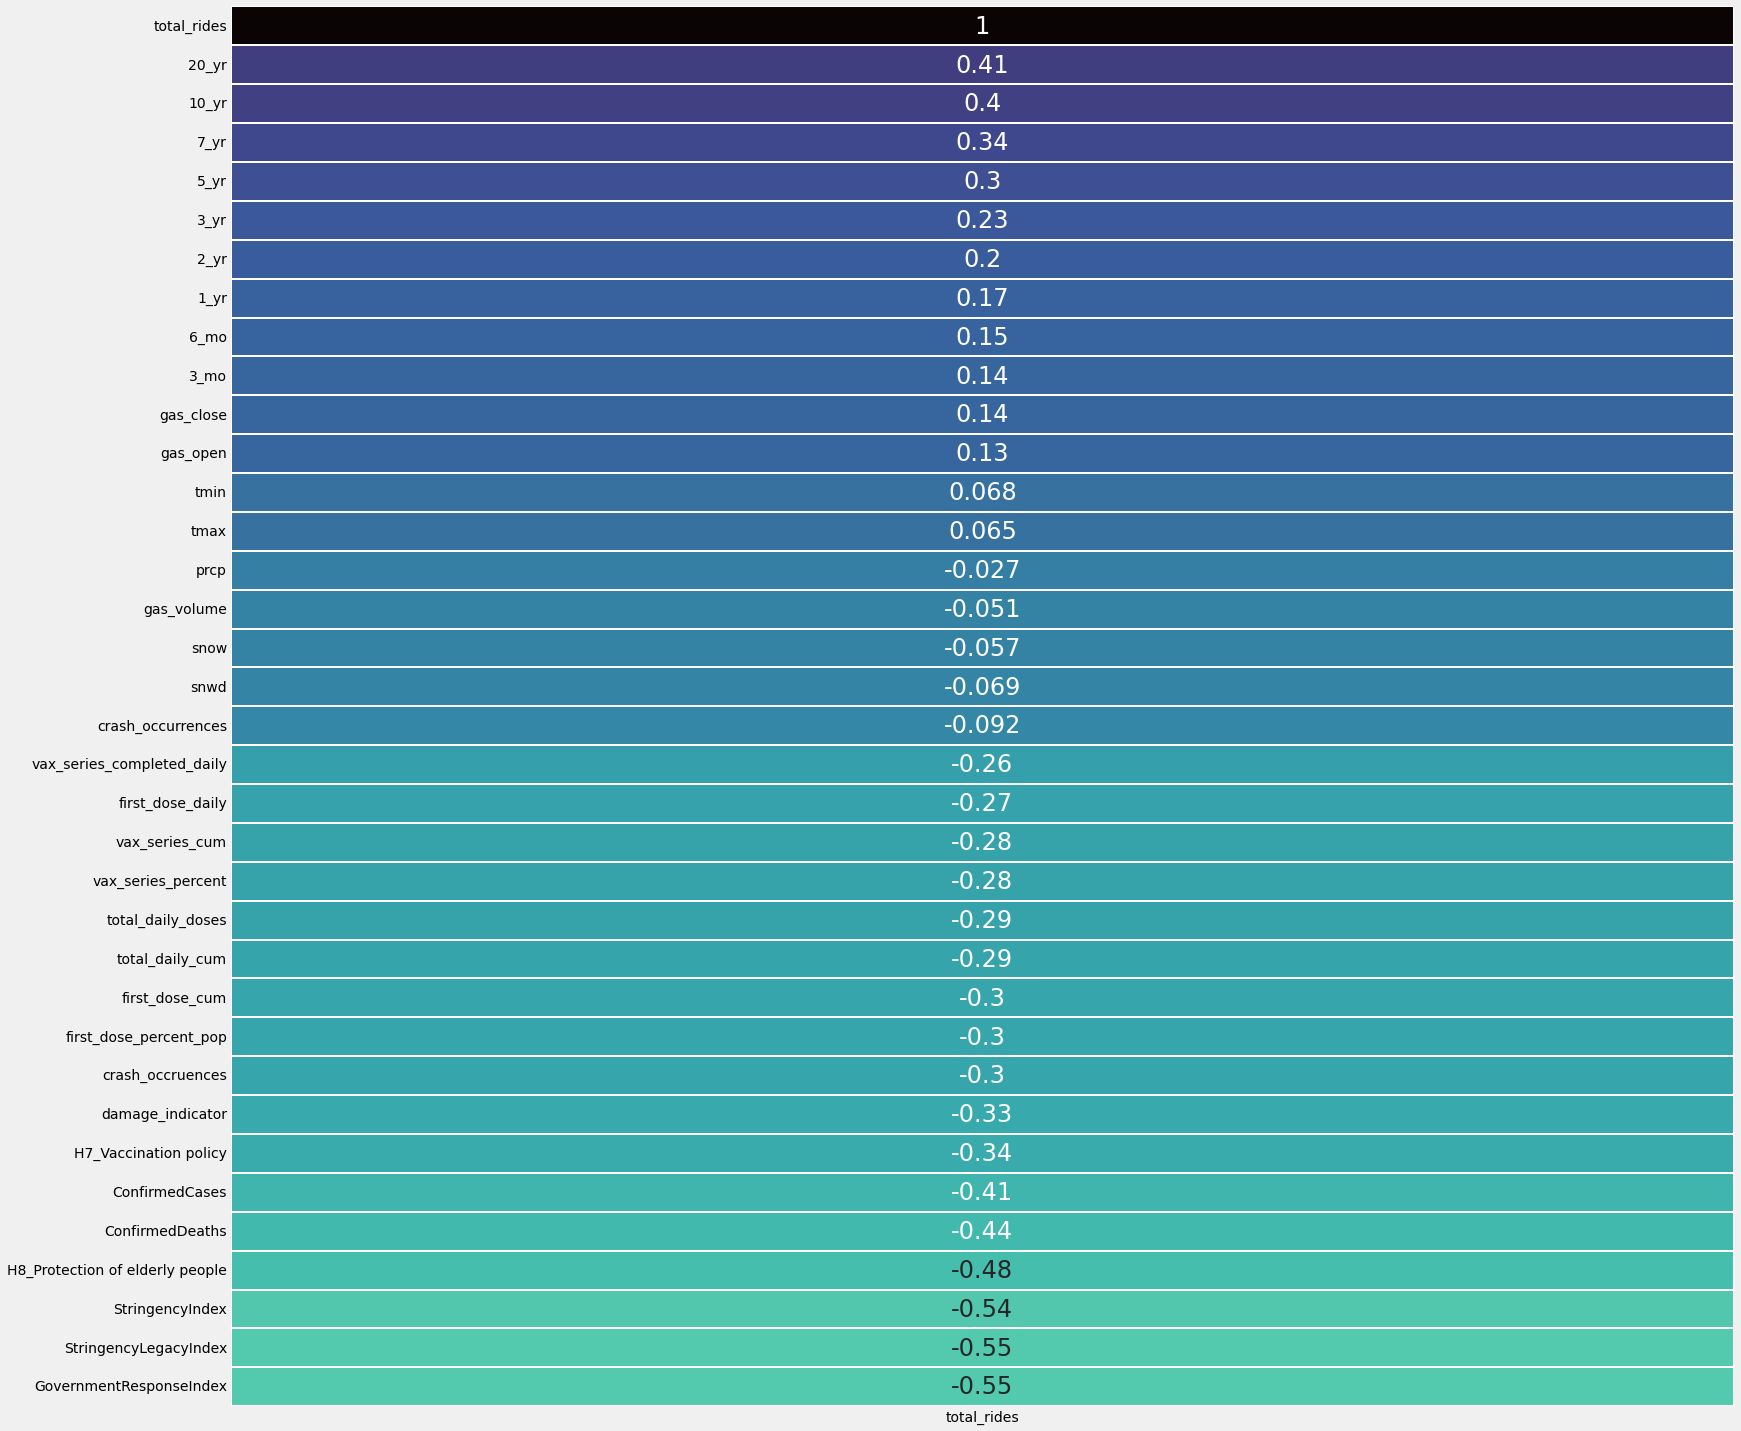

In [184]:
plt.figure(figsize=(24,24))
sns.heatmap(X.corr()[['total_rides']].sort_values(by='total_rides',ascending=False),vmin=-1,vmax=1,
            cmap= 'mako_r',linewidths=.1,annot=True, annot_kws={'fontsize':24},cbar=False);